In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("student-mat.csv", sep=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


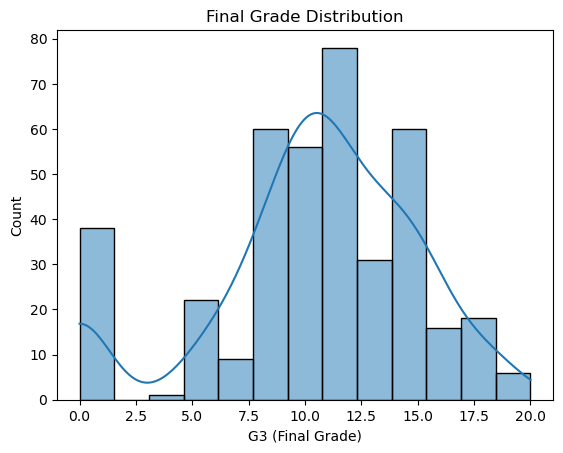

In [4]:
sns.histplot(df['G3'], kde=True)
plt.title("Final Grade Distribution")
plt.xlabel("G3 (Final Grade)")
plt.show()

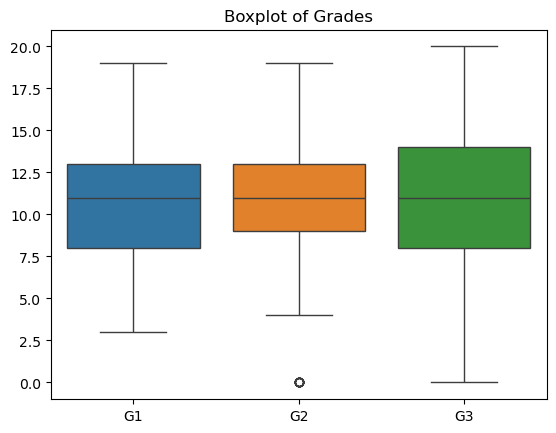

In [5]:
sns.boxplot(data=df[['G1', 'G2', 'G3']])
plt.title("Boxplot of Grades")
plt.show()

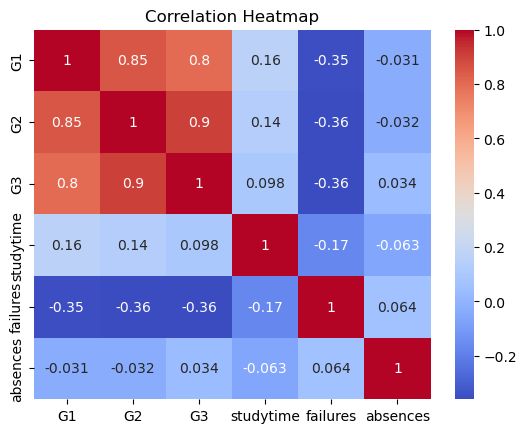

In [6]:
correlation = df[['G1', 'G2', 'G3', 'studytime', 'failures', 'absences']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [7]:
group1 = df[df['internet'] == 'yes']['G3']
group2 = df[df['internet'] == 'no']['G3']
t_stat, p_val = ttest_ind(group1, group2)
print(f"T-Test: t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")

T-Test: t-statistic = 1.9619, p-value = 0.0505


In [8]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [9]:
X = df_encoded.drop('G3', axis=1)
y = df_encoded['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Model Evaluation:\nR² Score = {r2:.4f}, RMSE = {rmse:.4f}")

Model Evaluation:
R² Score = 0.7971, RMSE = 2.0397


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("student-mat.csv", sep=";")

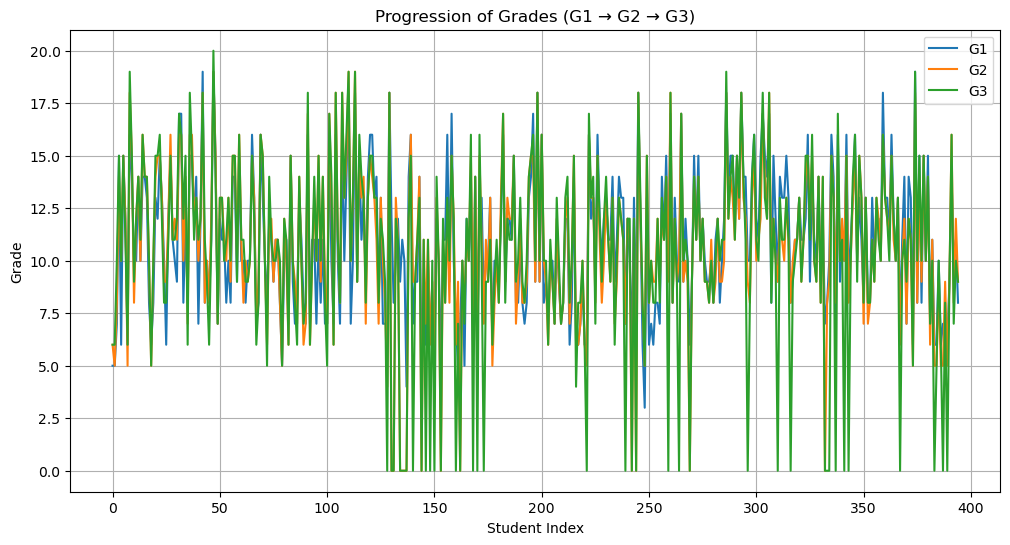

In [12]:
df[['G1', 'G2', 'G3']].plot(kind='line', figsize=(12,6))
plt.title("Progression of Grades (G1 → G2 → G3)")
plt.xlabel("Student Index")
plt.ylabel("Grade")
plt.legend(["G1", "G2", "G3"])
plt.grid(True)
plt.show()

In [13]:
df["grade_level"] = pd.cut(df["G3"], bins=[0, 9, 13, 20], labels=["Low", "Medium", "High"])

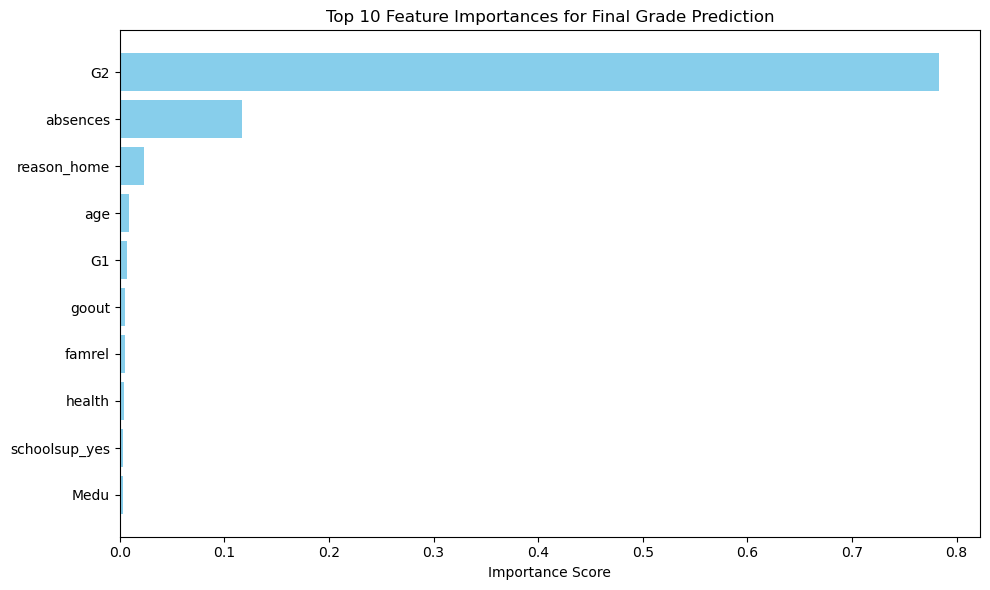

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the trained RandomForest model
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False).head(10)  # Top 10 features

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Most important on top
plt.title("Top 10 Feature Importances for Final Grade Prediction")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


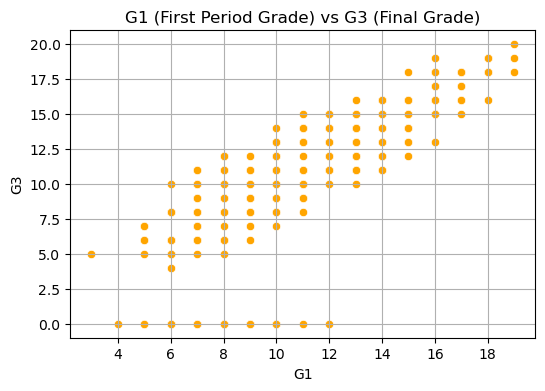

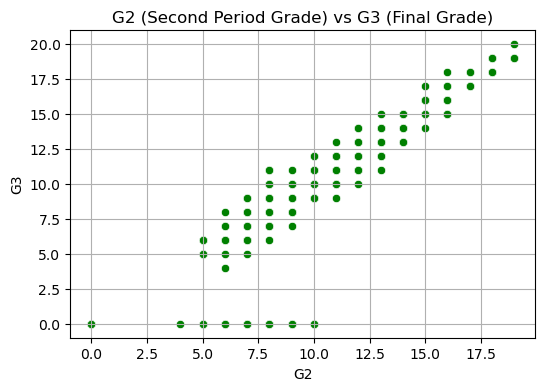

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# G1 vs G3
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='G1', y='G3', color='orange')
plt.title("G1 (First Period Grade) vs G3 (Final Grade)")
plt.xlabel("G1")
plt.ylabel("G3")
plt.grid(True)
plt.show()

# G2 vs G3
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='G2', y='G3', color='green')
plt.title("G2 (Second Period Grade) vs G3 (Final Grade)")
plt.xlabel("G2")
plt.ylabel("G3")
plt.grid(True)
plt.show()


C:\Users\harsh\AppData\Local\Temp\ipykernel_20028\1223810635.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


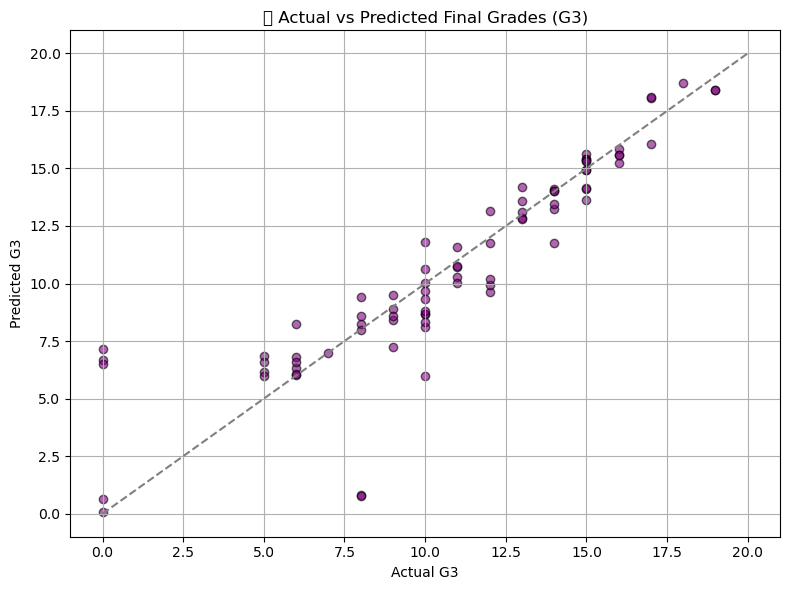

In [16]:
import matplotlib.pyplot as plt

# Plot actual vs predicted final grades
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple', edgecolor='k')
plt.plot([0, 20], [0, 20], '--', color='gray')  # Diagonal reference line
plt.title(" Actual vs Predicted Final Grades (G3)")
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.grid(True)
plt.tight_layout()
plt.show()
